<a href="https://colab.research.google.com/github/arpitsharma27/PythonPractice/blob/main/UniversityOf_Michigan_Week3_Nhanes_Multivariate_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url="https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
df=pd.read_csv(url)

In [3]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

# **Question 1**

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure(BPXDI1 BPXDI2). Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


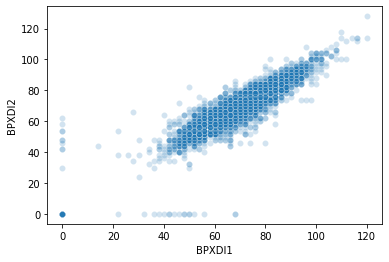

In [6]:
sns.scatterplot(df.BPXDI1, df.BPXDI2,alpha=0.2)
plt.show()

In [12]:
df[["BPXDI1", "BPXDI2", "BPXSY1", "BPXSY2"]].corr()

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.316531,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.303847
BPXSY1,0.316531,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.303847,0.962287,1.000000


# **Question 2**

Log Transform the four blood pressure variables and repeat question 1

In [16]:
df["BPXDI1_log2"]=np.log2(df['BPXDI1'])
df["BPXDI2_log2"]=np.log2(df['BPXDI2'])
df["BPXSY1_log2"]=np.log2(df['BPXSY1'])
df["BPXSY2_log2"]=np.log2(df['BPXSY2'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df[["BPXDI1_log2","BPXDI2_log2","BPXSY1_log2","BPXSY2_log2"]].corr()

,BPXDI1_log2,BPXDI2_log2,BPXSY1_log2,BPXSY2_log2
BPXDI1_log2,1.000000,0.888256,0.330588,0.339144
BPXDI2_log2,0.888256,1.000000,0.304323,0.329064
BPXSY1_log2,0.330588,0.304323,1.000000,0.958549
BPXSY2_log2,0.339144,0.329064,0.958549,1.000000


# **Question 3**

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement. Stratify the plots by gender(rows) and by race/ethnicity groups(columns)

In [21]:
df["RIAGENDRx"]=df.RIAGENDR.replace({1:"Male" , 2:"Female"})

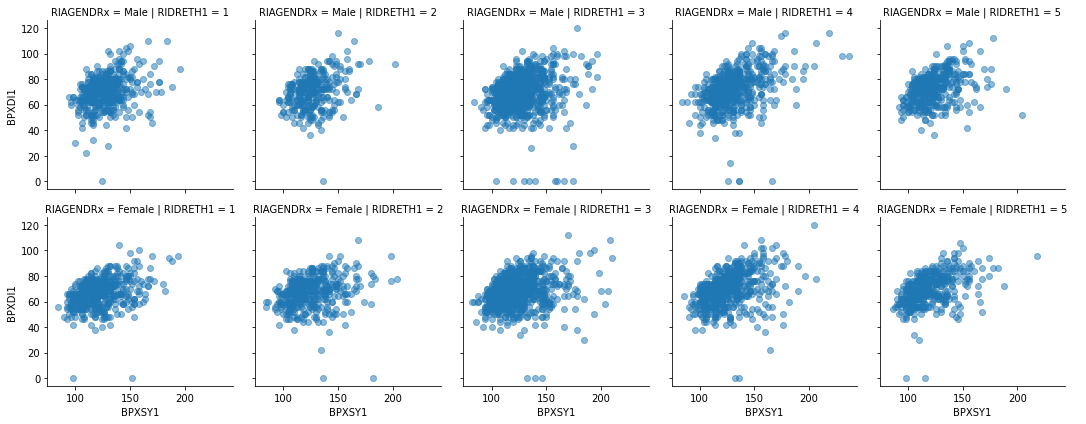

In [22]:
_ = sns.FacetGrid(df, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

# **Question 4**

Use "Violin Plots" to compare the distributions of ages within groups defined by gender and educational attainment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


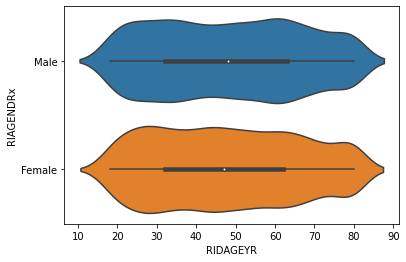

In [27]:
sns.violinplot(df.RIDAGEYR, df.RIAGENDRx)

In [29]:
df["DMDEDUC2x"]=df.DMDEDUC2.replace({1:"<9" ,2:"9-11" ,3:"HS/GED" ,4:"SomeCollege/AA" ,5:"College" ,7:"Refused" ,9:"Don't Know" })

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


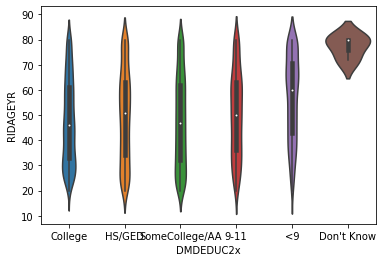

In [31]:
sns.violinplot(df.DMDEDUC2x, df.RIDAGEYR)

# **Question 5**

Use violin plots to compare the distributions of BMI within a series of 10-year age bands. Also stratify these plots by gender.

In [33]:
df.RIDAGEYR.value_counts()
df.RIDAGEYR.describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [41]:
#df[["RIDAGEYRx"]]=df.RIDAGEYR.replace({18-30:"18-30",30-40:"30-40",40-50:"40-50",50-60:"50-60",60-70:"60-70",70-80:"70-80"})
bins= [18,30,40,50,60,70,80]
labels = ['<30','30-<40','40-<50','50-<60','60-<70', '70-<80']
df['RIDAGEYRx'] = pd.cut(df['RIDAGEYR'], bins=bins, labels=labels, right=False)


In [42]:
df.RIDAGEYRx.value_counts()

<30       1192
30-<40     933
60-<70     917
40-<50     913
50-<60     888
70-<80     549
Name: RIDAGEYRx, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


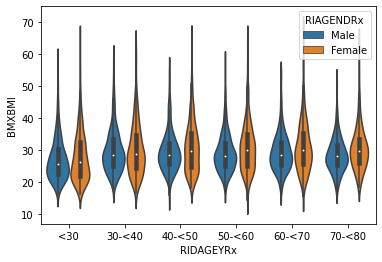

In [45]:
#BMXBMI
sns.violinplot(df.RIDAGEYRx,df.BMXBMI,df.RIAGENDRx)

# **Question 6**

Construct a frequency table for the joint distribution of ethinicty groups(RIDRETH1) and health-insurance status(HIQ210). Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [52]:
pd.crosstab(df.RIDRETH1, df.HIQ210, normalize=0)

HIQ210,1.0,2.0,9.0
RIDRETH1,,,
1,0.137982,0.857567,0.004451
2,0.128696,0.871304,0.000000
3,0.067354,0.931432,0.001214
4,0.108654,0.890385,0.000962
5,0.081761,0.915723,0.002516
